In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

df = pd.read_csv("diabetes.csv") 
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

imputer = SimpleImputer(strategy='mean')
df[cols_with_zero] = imputer.fit_transform(df[cols_with_zero])


In [3]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

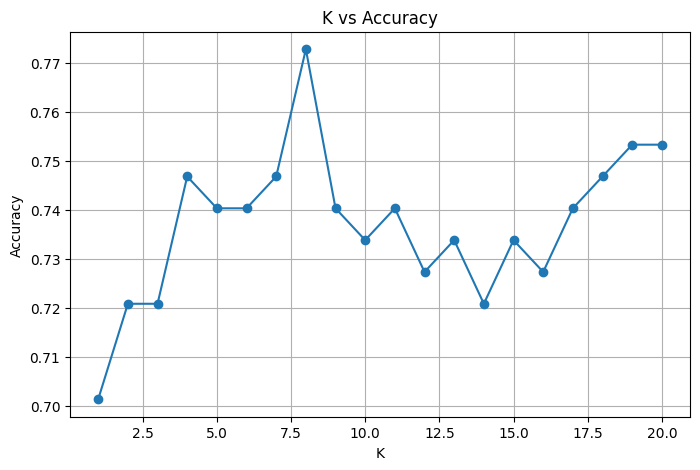

In [4]:
k_vals = range(1, 21)
acc_scores = []

for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.plot(k_vals, acc_scores, marker='o')
plt.title("K vs Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [5]:
best_k = k_vals[np.argmax(acc_scores)]
print(f"Best K value is {best_k}")
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

Best K value is 8


Confusion Matrix:
| 88  12  |
| 23  31  |


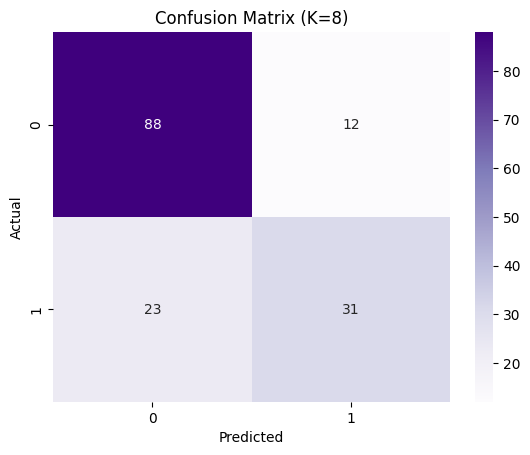

FP : [0.   0.   0.02 0.08 0.12 0.21 0.3  0.44 0.58 1.  ]
TP : [0.         0.01851852 0.18518519 0.35185185 0.57407407 0.62962963
 0.77777778 0.85185185 0.94444444 1.        ]


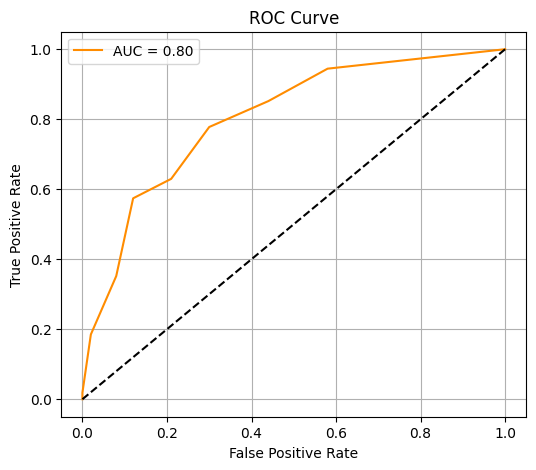

In [6]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
for row in confusion_matrix(y_test, y_pred):
    print("|", end=' ')
    for val in row:
        print(val, " ", end='')
    print('|')
    
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title(f"Confusion Matrix (K={best_k})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

print(f"FP : {fpr}\nTP : {tpr}")

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()
